# CSX46 Homework 1

In this homework assignment, you will be analyzing the human metabolic network. A simplified version of that network is provided for you in edge-list format in a two-column, tab-delimited text file `hsmetnet.txt` that is available at the following URL:  
[https://csx46.s3-us-west-2.amazonaws.com/hsmetnet.txt](https://csx46.s3-us-west-2.amazonaws.com/hsmetnet.txt)
In case you want to check that you have a complete and uncorrupted version of the file, here is it's MD5 checksum: `50bc7295c1f727cdc5867e4853a27583`. An example of the `hsmetnet.txt` file format is shown here:
```
alkylated DNA   REACTION1
REACTION1       DNAn
REACTION1       alkylated nucleobase
acetyl-CoA      REACTION2
1-alkyl-2-lyso-sn-glycero-3-phosphocholine      REACTION2
REACTION2       1-alkyl-2-acetyl-sn-glycero-3-phosphocholine
REACTION2       coenzyme A
deoxyribonucleoside triphosphate        REACTION3
(deoxynucleotides)(n)   REACTION3
```
You will see that there are two types of nodes; nodes that start with `REACTION` and nodes that do not. The former represent chemical *reactions*, and the latter represent *metabolites*. This graph is directed, so the ordering of the nodes is important; a row of the form
```
some-metabolite    REACTION523
```
is saying that metabolite `some-metabolite` is an *input* to (i.e., a reactant for) reaction `REACTION523`. Conversely, a row of the form
```
REACTION634    another-metabolite
```
is saying that metabolite `another-metabolite` is an *output* of (i.e., a product of) reaction `REACTION634`. A graph with two classes of nodes (and for which the only allowed edges are *between* nodes of the two classes, never *among* nodes of a single class) is called *bipartite*. So in this homework assignment we will be analyzing the human metabolic network as a bipartite graph.

You will need to submit your homework assignment as either a Jupyter notebook (preferred) or a PDF of a report showing both code *and* results from running the code.

For this homework assignment, you will need cairo, igraph, pandas, matplotlib, and numpy

In [1]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
import cairo
!pip install python-igraph
import igraph, matplotlib
from igraph import Graph
import pandas as pd
import numpy as np

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgif-dev is already the newest version (5.1.9-2build2).
libgif-dev set to manually installed.
libjpeg-dev is already the newest version (8c-2ubuntu10).
libjpeg-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin libice-dev
  liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev libxcb-render0-dev
  libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin | libgdk-pixbuf2.0-dev
  libxml2-utils libice-doc libsm-doc
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev libglib2.0-dev
  libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol-dev
  libsm-dev libxcb-render0-dev libxcb-shm0-dev
0 upgrad

Next, you will want to download the metabolic network from the CSX46 S3 bucket into your Google Colab instance:

In [2]:
!wget https://csx46.s3-us-west-2.amazonaws.com/hsmetnet.txt -O hsmetnet.txt

--2024-02-12 22:14:49--  https://csx46.s3-us-west-2.amazonaws.com/hsmetnet.txt
Resolving csx46.s3-us-west-2.amazonaws.com (csx46.s3-us-west-2.amazonaws.com)... 3.5.84.167, 52.218.221.201, 52.92.243.10, ...
Connecting to csx46.s3-us-west-2.amazonaws.com (csx46.s3-us-west-2.amazonaws.com)|3.5.84.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 647637 (632K) [text/plain]
Saving to: ‘hsmetnet.txt’

hsmetnet.txt        100%[===================>] 632.46K  3.28MB/s    in 0.2s    

2024-02-12 22:14:49 (3.28 MB/s) - ‘hsmetnet.txt’ saved [647637/647637]



Next, read in the metabolic network as an edge-list (hint: use `read_csv` from `pandas`) into a `pandas.DataFrame`. Name the two columns `source` and `target`. Show the first six rows of the data frame. Note, there are some duplicate rows in the data file (for whatever reason) so you will want to use the `drop_duplicates` method on the Pandas data frame.

In [20]:
df = pd.read_csv("hsmetnet.txt",sep="\t",names=["source","target"]).drop_duplicates()

df.head(6)

,source,target
0,alkylated DNA,REACTION1
1,REACTION1,DNAn
2,REACTION1,alkylated nucleobase
3,acetyl-CoA,REACTION2
4,1-alkyl-2-lyso-sn-glycero-3-phosphocholine,REACTION2
5,REACTION2,1-alkyl-2-acetyl-sn-glycero-3-phosphocholine


Next, you will want to construct an igraph Graph from the pandas dataframe (hint: use `Graph.TupleList` with `directed=True`; you can use  `.values.tolist()` on the Pandas dataframe

In [21]:
hmn_graph = Graph.TupleList(df[["source","target"]].values.tolist(),
                                 directed=True)
hmn_graph.summary()

'IGRAPH DN-- 7879 19537 -- \n+ attr: name (v)'

**<font color='orange'>Question:** *How many distinct metabolites are there in the graph?* *How many reactions?* *How many edges are there?*</font>

(hint: use list comprehension, `in`, `for`, `len`, `str`, `set`, and `shape`)

(You can assume that no metabolite name has "REACTION" as a substring).

In [22]:
vertex_names = hmn_graph.vs["name"]
reaction_names = [vertex_name for vertex_name in vertex_names if "REACTION" in vertex_name]
reaction_names_set = set(reaction_names)
metabolite_names = [vertex_name for vertex_name in vertex_names if not (vertex_name in reaction_names_set)]
print("number of distinct metabolites in the graph: " + str(len(metabolite_names)))
print("number of distinct reactions in the graph: " + str(len(reaction_names)))
edges = hmn_graph.ecount()
print("number of edges in the graph:", edges)


number of distinct metabolites in the graph: 2340
number of distinct reactions in the graph: 5539
number of edges in the graph: 19537


<font color="orange">**Question**: *In this graph, what are the top six metabolites in terms of vertex degree? (indegree+outdegree counted together)*</font>

(hint: use list comprehension, `for`, `enumerate`, `sorted` (with `reverse=True`), and `lambda` or `itemgetter`)

In [24]:
metabolite_names_set = set(metabolite_names)
vertex_degrees = hmn_graph.degree()
metabolite_inds = [index for index, vname in enumerate(vertex_names) if vname in metabolite_names_set]
metabolite_degrees = [vertex_degrees[i] for i in metabolite_inds]
sorted_metabolites = [i[0] for i in sorted(enumerate(metabolite_degrees),
                          key=lambda x:x[1],
                          reverse=True)]

{ metabolite_names[metabolite_id] for metabolite_id in sorted_metabolites[0:6] }


{'ADP',
 'ATP',
 '[protein] (L-serine/L-threonine) phosphate',
 '[protein]-(L-serine/L-threonine)',
 'coenzyme A',
 'phosphate'}

<font color="orange">**Task:** *Plot the distribution of the degrees of all of the metabolite vertices, on log-log scale*  (indegree+outdegree counted together).</font>

(hint: use `degree_distribution` in igraph, with `vertices=metabolite_inds`; use the `.bins()` method to get the bin counts out; you can use `matplotlib.pyplot.loglog` to plot)

(hint: do not try to plot bin counts of zero, as they cannot be plotted on a log scale; those zero counts should be removed before plotting)

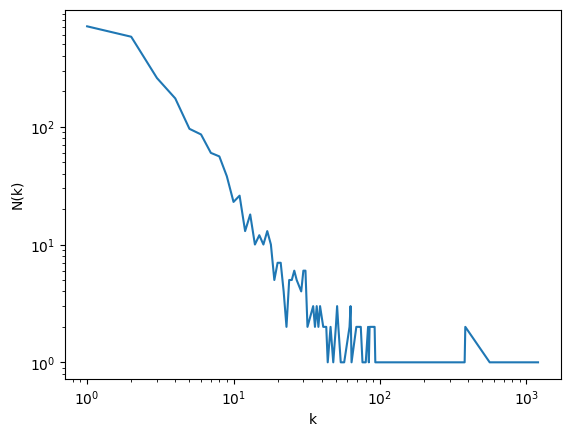

In [25]:
metab_degree_dist = hmn_graph.degree_distribution(vertices=metabolite_inds)
xs, ys = zip(*[(left, count) for left, _, count in metab_degree_dist.bins() if count > 0])
matplotlib.pyplot.loglog(xs, ys)
matplotlib.pyplot.xlabel("k")
matplotlib.pyplot.ylabel("N(k)")
matplotlib.pyplot.show()

<font color="orange">**Question**: *what is the exponent α of the best-fit power-law to the degree distribution?*</font>

(hint: use `igraph.statistics.power_law_fit`, and on the object that is returned, get the value of the `.alpha` variable)

In [26]:
alpha = igraph.statistics.power_law_fit(metabolite_degrees).alpha
print("%.2f" % alpha)

2.02


<font color="orange">**Conceptual questions**: *How does the α that you get compare to the estimate of the power-law exponent reported by Jeong et al. in their 2000 article in Nature, “The large-scale organization of metabolic networks” (vol. 407, pp. 651–654) (see page 14 of reading-for-class-06.pdf)? Based on structure of the network that you analyzed (bipartite, containing reactions) vs. the structure of the network that they analyzed (network projected to a network containing only metabolites), is it appropriate to compare the exponents? Why or why not?*</font>

(You may also find page 12 of the supplementary material for the Jeong et al. article useful; that can be found [here](https://drive.google.com/file/d/1mEY3ikVKwUMVBiQDcM7-G-n1FFphm8LK/view?usp=share_link)).

Answer: The alpha we get is 2.02 and the gamma on the paper was 2.2 which is a similar value.
But, comparing the exponents directly might be not appropriate, because of the structural differences between the networks analyzed. The network analyzed in our work is bipartite graph which contains both metabolites and reactions as distinct types of vertices. On the other hand, the paper focused on networks projected to contain only metabolites, effectively transforming the network into a unipartite graph.
In a bipartite graph, edges connect two types of nodes (metabolites and reactions), which can lead to different topological properties compared to a unipartite graph where edges connect nodes of the same type (only metabolites).



**Task**: calculate the shortest-path-lengths between all pairs of metabolites (vertices) in the giant weakly connected component of the graph, discarding direction information in the graph.

(hint: use `igraph.Graph.connected_components` with `mode=weak` to get the giant weakly-connected component; then use `components.membership` to get a list (of length equal to the number of vertices) specifying which component each vertex is a member of. Then call `sizes()` on the object returned from `connected_components()` to get the sizes of each component, and use `numpy.argmax` to confirm that component 0 is the giant component. Then use `enumerate` to get the giant component members; then use `igraph.Graph.distances` with `mode=igraph.ALL`, with
`source=<metabolite_vertex_indices>` and `target=<metabolite_vertex_indices>` to get the
all-pairs-shortest-paths.)

In [27]:
components = hmn_graph.clusters(mode="weak")
metabolite_inds_giant_component =  [index for index, item in enumerate(components.membership) if item==0 and index in metabolite_inds]

apsp_distances = hmn_graph.shortest_paths(source=metabolite_inds_giant_component,
                                                target=metabolite_inds_giant_component,
                                                mode=igraph.ALL)

<ipython-input-27-abd17d9995b6>:1: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  components = hmn_graph.clusters(mode="weak")
<ipython-input-27-abd17d9995b6>:4: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  apsp_distances = hmn_graph.shortest_paths(source=metabolite_inds_giant_component,


<font color="orange">**Question:** *What is the average of the shortest-path-lengths between all pairs of metabolites in the giant (weakly connected) component of the network?*</font>

(Note: in calculating your average, do not include pairs of vertices that are the same vertex as both source and destination, which would have a distance of zero)

(hint: Use `numpy.array`, `numpy.isfinite` and `numpy.mean` to get the mean distance; throw away any shortest-paths distance value if it is infinite.)

In [28]:
apsp_np = np.array([item for sublist in apsp_distances for item in sublist])
avg_dist = np.mean(apsp_np[apsp_np > 0 & np.isfinite(apsp_np)])
print("%.2f" % avg_dist)

6.80


<font color="orange">**Question**: *What is the maximum of the shortest-path-length between all pairs of metabolites (throwing away infinite values, as before) in the giant (weakly connected) component of the network?*</font>

(hint: use `numpy.max` and `numpy.isfinite`; Note, you are calculating the diameter of the giant component)

In [29]:
np.max(apsp_np[apsp_np > 0 & np.isfinite(apsp_np)])

18

<font color="orange">**Conceptual question:**  *Why are the average geodesic distances that we get, roughly twice those reported in Fig. 3b of Jeong et al., 2000?*</font>

Answer: The average geodesic distance being roughly twice those reported by paper can be attributed to the structural differences in the networks analyzed. Our work considers both metabolites and reactions within a bipartite graph, resulting in longer path lengths as paths must alternate between these two types of nodes. However, the paper's analysis focuses on a unipartite network of only metabolites.



**Task:** Calculate the shortest-paths betweenness centrality for all metabolites in the directed network.  (hint: use the `betweenness` function with the `vertices=<vector of vertex indices>` option, with `directed=True`)

In [30]:
bc = hmn_graph.betweenness(vertices=metabolite_inds, directed=True)

<font color="orange">**Task:** *plot the scatter plot of betweenness centrality vs. vertex degree for all metabolites, on log-log scale.*</font>  (In the plot, normalize your betweenness centrality values by dividing by M^2 where M is the number of metabolites.)

(hint:  use `numpy.array`, `numpy.where`, and `matplotlib.pyplot.scatter`)

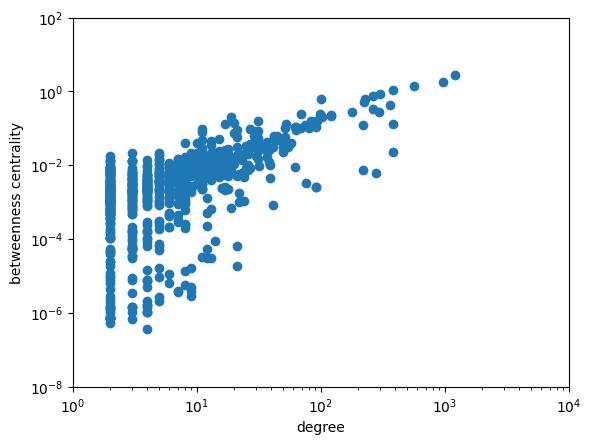

In [17]:
ax = matplotlib.pyplot.gca()
ax.set_xscale("log")
ax.set_yscale("log")
degrees = np.array(metabolite_degrees)
bcnp = np.array(bc)
Nmp = len(metabolite_inds)
inds_keep = np.where(bcnp > 1e-38)
ax.scatter(degrees[inds_keep],
           bcnp[inds_keep]/((Nmp-1)*(Nmp-2)))
matplotlib.pyplot.xlabel("degree")
matplotlib.pyplot.ylabel("betweenness centrality")
matplotlib.pyplot.ylim(1e-8, 100)
matplotlib.pyplot.xlim(1, 1e+4)
matplotlib.pyplot.show()

<font color="orange">**Question**: *Among metabolites with degree k=2 , what metabolite has highest betweenness centrality in the network?*</font>

(hint:  use `numpy.argmax` and `numpy.where`)

In [31]:
inds_deg2 = np.where(degrees==2)[0]
metabolite_names[inds_deg2[np.argmax(bcnp[inds_deg2])]]

'L-arginino-succinate'

<font color="orange">**Conceptual questions:**</font> Search on this metabolite in the HumanCyc database at [humancyc.org](https://humancyc.org), using the "Quick Search" box. Click on the hyperlinked metabolite that is displayed on the search results page. Click on the "reactions" tab, in the tabbed window in the lower part of the page. <font color="orange">What important metabolic cycles is this metabolite involved in?</font> Click on the "urea cycle". <font color="orange">What is the known consequence of absence of an enzyme in this pathway?</font>

Answer:
Reactions known to produce this compound case, the metabolic cycle is this,

L-aspartate + L-citrulline + ATP
→ L-arginino-succinate + AMP + diphosphate + H+

In this case, according to HumanCyc, absence of any urea cycle enzyme is lethal. Congenital deficiencies of any of the enzymes of the urea cycle or liver failure cause hyperammonemia, characterized by mental retardation and lethargy.
